In [101]:
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from solution import MultinomialLogReg
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import random


In [181]:
df = pd.read_csv("dataset.csv", delimiter=";")
df = df.drop(columns="TwoLegged")
transformer = ColumnTransformer(
    transformers=[
        ("pass", "passthrough", ["Transition"]),
        ("cat1", OneHotEncoder(drop=["EURO"]), ["Competition"]),
        ("cat2", OneHotEncoder(drop=["dribble or cut"]), ["Movement"]),
        ("cat3", OneHotEncoder(drop=["G"]), ["PlayerType"]),
        ("scaled", StandardScaler(), ["Angle", "Distance"])
    ]
)

# Correlation analysis

In [ ]:
dropless_transformer = ColumnTransformer(
    transformers=[
        ("pass", "passthrough", ["Transition", "TwoLegged"]),
        ("categorical", OneHotEncoder(), ["Competition", "Movement", "PlayerType"]),
        ("scaled", StandardScaler(), ["Angle", "Distance"])
    ]
)

In [163]:
y = df["ShotType"]
X = df.drop(columns="ShotType")

y = df["ShotType"]
X = df.drop(columns="ShotType")

dropless_X = dropless_transformer.fit_transform(X)
dropless_y = LabelEncoder().fit_transform(y)



dropless_transformed_df = pd.DataFrame(dropless_X, columns=dropless_transformer.get_feature_names_out())
dropless_transformed_df["ShotType"] = dropless_y

,pass__Transition,pass__TwoLegged,categorical__Competition_EURO,categorical__Competition_NBA,categorical__Competition_SLO1,categorical__Competition_U14,categorical__Competition_U16,categorical__Movement_dribble or cut,categorical__Movement_drive,categorical__Movement_no,categorical__PlayerType_C,categorical__PlayerType_F,categorical__PlayerType_G,scaled__Angle,scaled__Distance,ShotType
pass__Transition,1.000000,-0.231411,0.017712,-0.012531,-0.063315,0.057173,0.013676,0.288207,-0.053483,-0.239188,-0.048375,-0.009976,0.045597,0.031282,-0.172259,0.164722
pass__TwoLegged,-0.231411,1.000000,0.061163,0.066317,0.053271,-0.157189,-0.075478,-0.774534,-0.354361,0.880078,0.066659,0.056205,-0.103680,-0.012536,0.480860,-0.478488
categorical__Competition_EURO,0.017712,0.061163,1.000000,-0.348442,-0.339800,-0.254212,-0.204795,-0.042215,0.003446,0.037126,-0.021373,-0.005856,0.021539,0.127379,0.050707,-0.031258
categorical__Competition_NBA,-0.012531,0.066317,-0.348442,1.000000,-0.315476,-0.236014,-0.190134,-0.079697,-0.013800,0.079761,-0.050012,0.008066,0.029456,-0.115271,0.056066,-0.077663
categorical__Competition_SLO1,-0.063315,0.053271,-0.339800,-0.315476,1.000000,-0.230161,-0.185419,-0.049318,-0.012383,0.051188,0.039772,-0.027368,-0.003265,-0.051103,0.042212,-0.048852
categorical__Competition_U14,0.057173,-0.157189,-0.254212,-0.236014,-0.230161,1.000000,-0.138716,0.133842,0.033009,-0.138634,0.015028,-0.005401,-0.005987,0.003405,-0.125259,0.125320
categorical__Competition_U16,0.013676,-0.075478,-0.204795,-0.190134,-0.185419,-0.138716,1.000000,0.088440,-0.006775,-0.077989,0.029344,0.042114,-0.062354,0.044127,-0.067328,0.078677
categorical__Movement_dribble or cut,0.288207,-0.774534,-0.042215,-0.079697,-0.049318,0.133842,0.088440,1.000000,-0.080284,-0.880074,-0.088775,-0.081332,0.144313,0.020686,-0.383418,0.409556
categorical__Movement_drive,-0.053483,-0.354361,0.003446,-0.013800,-0.012383,0.033009,-0.006775,-0.080284,1.000000,-0.402647,-0.030261,0.012764,0.010238,0.038836,-0.163799,0.272989
categorical__Movement_no,-0.239188,0.880078,0.037126,0.079761,0.051188,-0.138634,-0.077989,-0.880074,-0.402647,1.000000,0.095940,0.068608,-0.137402,-0.037497,0.430129,-0.506148


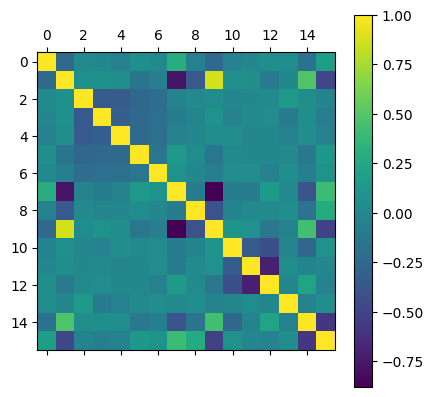

In [165]:
cm2 = dropless_transformed_df.corr()
plt.matshow(cm2)
plt.colorbar()
cm2

This shows that the following should be dropped:\
* Two Legged
* Dribble or cut
* Player type G

# Bootstrap pipeline

In [182]:
n_rows = df.shape[0]
indices = range(n_rows)
all_betas = np.zeros((5, 12, 1))



for i in range(1):
    bootstrap_indices = random.choices(indices, k=n_rows)
    bootstrap_dataset = df.loc[bootstrap_indices]

    y = bootstrap_dataset["ShotType"]
    X = bootstrap_dataset.drop(columns="ShotType")

    transformer.fit(X)
    transformed_X = transformer.transform(X)

    encoder = LabelEncoder()
    encoder.fit(y)

    encoded_y = encoder.transform(y)

    mult_reg = MultinomialLogReg()
    mult_reg.build(transformed_X, encoded_y)

    betas = mult_reg.betas.T

    all_betas[:, :, i] = betas

transformed_df = pd.DataFrame(transformed_X, columns=transformer.get_feature_names_out())


KeyboardInterrupt: 

In [ ]:
np.mean(all_betas, axis=2)

array([[-5.79844600e-04, -5.06946834e-01, -4.81165414e-01,
         9.21103126e-01, -7.39177367e-03,  8.39742111e+00,
         2.27023147e+00, -7.10599541e+00, -6.66611212e+00,
         4.92852611e-01,  1.12227744e+01,  2.05202013e+01],
       [ 5.95252141e-01,  8.87823718e-01, -2.35999046e-01,
         1.27401356e+00, -6.30065342e-01, -6.60432510e+00,
        -2.86456329e+00, -1.56266303e+00,  9.78595056e+00,
         4.35640341e-01,  4.33667098e+00, -4.76094154e+00],
       [-5.01484374e-01, -2.28352171e-01, -6.66197797e-01,
         2.81439682e-01, -3.68436145e-02,  6.83103445e+00,
         1.09625538e+00, -2.38912901e+00,  1.07366274e+01,
         2.44715616e-01,  9.10368615e+00,  1.12715196e+00],
       [ 3.66057780e-01, -3.76191263e-01, -3.07862910e-01,
         1.12461516e+00,  4.54748142e-01,  8.47437320e+00,
         2.80143633e+00,  5.48189488e+00, -8.51380560e+00,
         7.43886778e-01,  6.60856225e+00,  1.71307208e+01],
       [ 1.92379097e-01, -7.73375838e-01, -2.4005056

,pass__Transition,one_hot__PlayerType_C,one_hot__PlayerType_G,categorical__Competition_NBA,categorical__Competition_SLO1,categorical__Competition_U14,categorical__Competition_U16,categorical__Movement_drive,categorical__Movement_no,scaled__Angle,scaled__Distance
pass__Transition,1.000000,-0.048375,0.045597,-0.012531,-0.063315,0.057173,0.013676,-0.053483,-0.239188,0.031282,-0.172259
one_hot__PlayerType_C,-0.048375,1.000000,-0.422036,-0.050012,0.039772,0.015028,0.029344,-0.030261,0.095940,-0.016393,-0.248804
one_hot__PlayerType_G,0.045597,-0.422036,1.000000,0.029456,-0.003265,-0.005987,-0.062354,0.010238,-0.137402,-0.020133,0.218623
categorical__Competition_NBA,-0.012531,-0.050012,0.029456,1.000000,-0.315476,-0.236014,-0.190134,-0.013800,0.079761,-0.115271,0.056066
categorical__Competition_SLO1,-0.063315,0.039772,-0.003265,-0.315476,1.000000,-0.230161,-0.185419,-0.012383,0.051188,-0.051103,0.042212
categorical__Competition_U14,0.057173,0.015028,-0.005987,-0.236014,-0.230161,1.000000,-0.138716,0.033009,-0.138634,0.003405,-0.125259
categorical__Competition_U16,0.013676,0.029344,-0.062354,-0.190134,-0.185419,-0.138716,1.000000,-0.006775,-0.077989,0.044127,-0.067328
categorical__Movement_drive,-0.053483,-0.030261,0.010238,-0.013800,-0.012383,0.033009,-0.006775,1.000000,-0.402647,0.038836,-0.163799
categorical__Movement_no,-0.239188,0.095940,-0.137402,0.079761,0.051188,-0.138634,-0.077989,-0.402647,1.000000,-0.037497,0.430129
scaled__Angle,0.031282,-0.016393,-0.020133,-0.115271,-0.051103,0.003405,0.044127,0.038836,-0.037497,1.000000,-0.056968


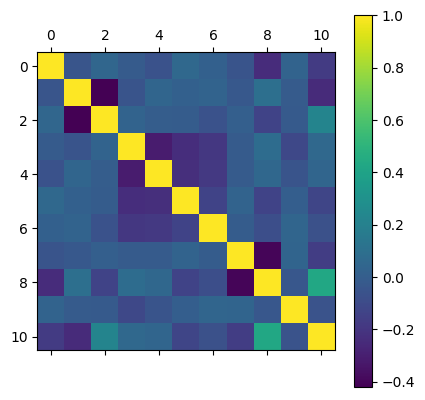

In [38]:
cm = transformed_df.corr()
plt.matshow(cm)
plt.colorbar()
cm

In [ ]:
df = pd.read_csv("dataset.csv")
df = df.drop(columns="TwoLegged")

y = df["ShotType"]
X = df.drop(columns="ShotType")

transformed_X = transformer.fit_transform(X)
encoded_y = encoder.fit_transform(y)

mult_reg = MultinomialLogReg()
mult_reg.build(transformed_X, encoded_y)

(array([-4.97825690e-01,  3.82493418e-01, -8.72199016e-01, -1.70085358e-01,
       -3.75447229e-01, -5.57366521e-01,  9.70554761e-01, -1.61452365e-01,
       -4.30449712e-01, -8.91025758e-01, -2.06960864e-01,  1.68993422e-02,
       -4.88475509e-01, -5.60700101e-02, -6.28253318e-03,  7.49995533e-01,
        1.21953421e+00,  1.74255363e-02,  1.00427707e+00,  9.19416522e-01,
       -1.81438437e-02, -2.28321118e-01, -9.13861905e-02,  4.56497563e-01,
       -4.05008285e-01,  7.93303840e+00, -6.02726022e+00,  6.28507908e+00,
        8.07229972e+00,  8.85626873e+00,  2.17415018e+00,  9.41429574e-02,
        1.07499531e+00,  2.76743287e+00,  2.79568386e+00, -6.91521882e+00,
       -1.44790465e+00, -2.37983772e+00,  5.32217429e+00,  5.75035468e+00,
       -7.45052790e+00,  8.66846140e+00,  9.91158545e+00, -9.34253133e+00,
       -9.56880069e+00,  3.46991172e-01,  2.24610216e-01,  9.62629836e-02,
        6.46845212e-01,  3.49655667e-01,  1.01898883e+01,  3.02263989e+00,
        8.06968916e+00, 

In [31]:
uniq = df["ShotType"].unique()
encoder.transform(uniq)
[i for i in range(mult_reg.betas.shape[1])]

[0, 1, 2, 3, 4]

So apparently one way to calculate the SE for each beta is sqrt(Var-Cov matrix of betas) and then every diagonal element. But after more reading this appears to be impossible without the Hessian or gradients for each observation?\
Bootstrap appears to be the only option.

In [32]:
columns = transformer.get_feature_names_out()
columns = np.append(columns, np.array("Intercept"))

In [145]:
betas = pd.DataFrame(mult_reg.betas.T, columns=columns, index=encoder.inverse_transform([i for i in range(mult_reg.betas.shape[1])]))
betas

,pass__Transition,one_hot__PlayerType_C,one_hot__PlayerType_G,categorical__Competition_NBA,categorical__Competition_SLO1,categorical__Competition_U14,categorical__Competition_U16,categorical__Movement_drive,categorical__Movement_no,scaled__Angle,scaled__Distance,Intercept
above head,0.804071,-1.040493,-1.172662,0.703687,0.389757,9.234756,2.067998,-8.525199,-5.974081,0.405022,13.991610,23.043320
dunk,1.259939,0.481995,-0.593585,0.944121,-0.007531,-7.447983,-0.325773,-1.839902,12.824853,0.371100,6.975760,-4.868671
hook shot,0.047701,-0.765443,-1.453305,-0.158931,0.286146,7.663295,0.529898,-2.469366,13.057706,0.164275,11.913297,2.174858
layup,1.192396,-0.788859,-0.932470,0.887098,0.871504,9.293219,2.603888,7.070036,-7.738301,0.715394,9.545912,19.664314
other,1.079379,-1.157477,-1.107691,0.798391,0.018265,9.983835,2.463180,7.215087,-8.097545,0.305784,13.546846,22.678833


I realize that the solution for the betas might not be really good because i one hot encoded each class for each variable, meaning big correlation.\
I will now compare the betas in the case where i leave one class out from each variable.

sirsa dist bet ce sta featurja korelirana.

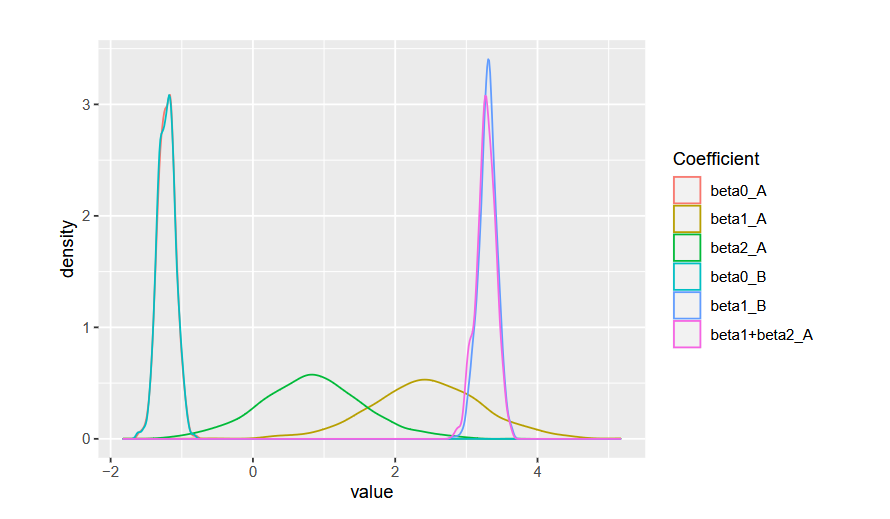

In [136]:
s1 = np.array([[1,2],[3,4]])
s2 = np.array([[5,6],[7,8]])

s3 = np.dstack([s1, s2])
np.dstack((s3, s1)).shape

(2, 2, 3)

In [131]:
np.mean(np.array([1,3,4]))

2.6666666666666665